# Recommender Systems - Amazon Reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# %%time
# df = pd.read_csv("./amazon_reviews_us_Toys_v1_00.tsv", sep='\t',header=0, error_bad_lines=False)
# 1.9 GB dataset from Amazon

Data wrangling

In [3]:
# df = df[['customer_id','product_id', 'star_rating']]
# df.rename(columns= {'star_rating':'score'}, inplace=True)

In [4]:
# rID_dict = {rID:'R'+ str(idx) for idx, rID in enumerate(df['customer_id'].unique()) }
# pID_dict = {pID:'P'+ str(idx) for idx, pID in enumerate(df['product_id'].unique()) }

In [5]:
# df.loc[:, 'product_id'] = df.loc[:,'product_id'].map(pID_dict)
# df.loc[:, 'customer_id'] = df.loc[:,'customer_id'].map(rID_dict)

# df.head()

Only select rows containing 500 most active customers rating the 5000 most-rated products

In [6]:
# print("Reviews per product, top and bottom reviewed\n")

# prod5000=df['product_id'].value_counts()[:5000]
# prod5000_names=prod500.index
# prod5000_nms_list=prod5000_names.tolist()
# prod5000_nms_list[:5]

In [7]:
# rev500=df['customer_id'].value_counts()[:500]
# rev500.head()
# rev500.sum()
# rev500_names=rev500.index
# rev500_nms_list=rev500_names.tolist()
# rev500_nms_list[:5]

In [8]:
# df_rev= df[df['customer_id'].isin(rev500_nms_list)]
# df_rev.shape

# df_prod500= df_rev[df_rev['product_id'].isin(prod5000_nms_list)]
# df_prod500.shape

# df_prod500.head()

# df_prod500.to_csv("df_prod_500-500.csv",header=True)

In [9]:
df_prod500 = pd.read_csv("./df_prod_500.csv")
df_prod500.head()

,customer_id,product_id,score
0,R2519,P707,5
1,R187,P3794,5
2,R13907,P25,5
3,R13168,P10022,4
4,R19490,P1876,5


In [10]:
# %%time
# Reviewers on rows, item on cols. 
reviews_500 = df_prod500.pivot(index = 'customer_id', columns = 'product_id')
reviews_500.fillna(0, inplace = True) # turns NA into 0
reviews_500.columns = reviews_500.columns.droplevel() # removes artifact of pivot function


print("shape: ", reviews_500.shape)
reviews_500.head()

shape:  (311, 422)


product_id,P0,P10002,P10022,P10058,P10069,P10185,P102803,P10298,P10456,P10553,...,P9209,P928,P9286,P9340,P9520,P964,P9694,P9717,P995,P9963
customer_id,,,,,,,,,,,,,,,,,,,,,
R10106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R10201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
R1025618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
R10285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1031863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Use PCA to select vectors as subset of total data, explaning about 80% of data variation

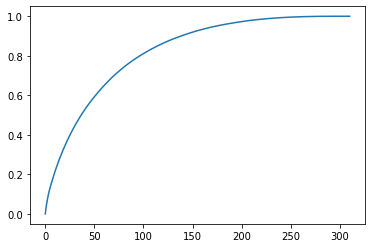

In [11]:
n_samples,n_features= reviews_500.shape
fig = plt.figure()
ax = plt.axes()
vs=[]
expls=[]
for v in range(0,min(n_samples, n_features)):
    pca = PCA(n_components=v)
    pca.fit(reviews_500)
    expl500=pca.explained_variance_ratio_  
    vs.append(v)
    expls.append(expl500.sum())
ax.plot(vs, expls)

It seems that about 100 vectors explain 80% of data variation

Examination of one user:

In [12]:
r101 = reviews_500.loc["R10106", :]
# numpy function returns all indexes that are not "0"
r101_nonzero = r101.to_numpy().nonzero()
print(r101_nonzero)
# collect names of reviewed products
r101_rev_prods = list(r101.iloc[r101_nonzero].index) 
print(len(r101_rev_prods))
r101_rev_prods[:5]

(array([266, 371], dtype=int64),)
2


['P39913', 'P7228']

Products not reviewed by r101:

In [13]:
# return list of all prods not in the "reviewed" list
r101_not_rev = np.setdiff1d(reviews_500.columns, r101_rev_prods) 

print(len(r101_not_rev))
r101_not_rev[:10]

420


array(['P0', 'P10002', 'P10022', 'P10058', 'P10069', 'P10185', 'P102803',
       'P10298', 'P10456', 'P10553'], dtype=object)

# Relevant Functions I

In [14]:
### Defining drop_rows_with_zeros

def drop_rows_with_zeros(df):
   
    
    return df.dropna()

In [15]:
### Function to define the Pearson's Correlation Coefficient.
def p_sim(ser1, ser2):
    
    def normalize(raw):
        return .5 + (raw/2)
    
    corr = np.corrcoef(ser1, ser2)[0][1] ### returns 2x2 array with correlation to self(1) on diagonal
    
    return normalize(corr)

In [16]:
###Function to define the cosine similarity.

def c_sim(ser1, ser2):
    def normalize(raw):
        return .5 + (raw/2)
    
    cosT = np.dot(ser1, ser2) / (np.linalg.norm(ser1)* np.linalg.norm(ser2))
    
    return normalize(cosT)

In [17]:
#provided
### Creating a function to create predictions in the manner described above.
### Note: "user" is a row, and "item" is a column in the df.
### simFunc defaults to p_sim

def scorePred(df, user, item, simFunc = p_sim, rev_items = None):
    """
    Positional Arguments --
        df: Pandas DataFrame
        user: Row-index in df
        item: Column-index in df
        simFunc: a similarity function (e_sim, p_sim, or c_sim)
        rev_items: For larger dfs, specifies all items reviewed by "user"
    """
    # Check to see if user has already scored item
    if df.loc[user,item] > 0:
        return "Already rated a "+str(df.loc[user,item])
    
    # rev_items used for larger DataFrame,
    # when you have all the items a particular user has reviewed already
    # otherwise, if "None" (if statement below)
    # take all other items other than item to predict
    if not rev_items:
        rev_items = set(df.columns)
        rev_items.remove(item)
    
    sim_total, user_sim_total = 0,0
    
    for other_item in rev_items:
        user_score_other_item = df.loc[user, other_item] # grab user score
        
        if user_score_other_item == 0:
            print("no user score")
            continue
        
        # Use function built above to drop all other users with "other_item" score of "0"
        no_zeros = drop_rows_with_zeros(df[[item, other_item]]) 
        sh = no_zeros.shape
        
        # If no other users, move to next item
        if sh[0] == 0:
            continue
            
        #print(no_zeros.shape)
        
        # calculate similarity score using non-zero information. 
        ser1 = no_zeros.iloc[:,0]
        ser2 = no_zeros.iloc[:,1]
        # print(ser1, ser2)
        ss = simFunc(no_zeros.iloc[:,0], no_zeros.iloc[:,1])
        # print(ss, user_score_other_item)
        
        # add up sim total and weighted sim total
        sim_total += ss
        user_sim_total += user_score_other_item * ss

        
    if sim_total == 0:
        return 0
    
    else:
        return user_sim_total / sim_total

# Predictions

In [18]:
%%time
#provided
## predict scores for products not yet reviewed by R0, using function built above: `scorePred`
### cosine similarity used because if a product all has only one value of review (e.g. all 5s)
### then the standard_deviation is 0 and the correlation coefficient is not calculable

preds500 = {}
for item in r101_not_rev:
    preds500[item] = scorePred(reviews_500, 'R10106', item, simFunc = c_sim, rev_items = r101_rev_prods)

pred_score500=pd.Series(preds500).sort_values(ascending = False)
pred_score500

Wall time: 3.83 s


P3896     3.0
P2749     3.0
P2644     3.0
P12228    3.0
P75992    3.0
         ... 
P1975     3.0
P15       3.0
P2373     3.0
P21946    3.0
P29207    3.0
Length: 420, dtype: float64

In [19]:
#mostly similar ratings predicted, because customer only rated 2 products with rating 3
pred_score500.value_counts() 

3.0    396
3.0     16
3.0      8
dtype: int64

# Singular Value Decomposition (SVD)

SVD for faster calculations + using only 100 vectors as found by PCA

In [20]:
%%time
# Perform SVD
u, sigma, _ = np.linalg.svd(reviews_500)

# Create function to decompose DataFrame
def return_svd(df , u, sigma, n):
    sigN = np.mat(np.eye(n) * sigma[:n]) #arrange Sig4 into a diagonal matrix
    n_svd_vectors = np.dot(df.T, np.dot(u[:,:n] , sigN.I))  #create transformed items
    return pd.DataFrame(n_svd_vectors).T

# use function to create decomposed DataFrame
svd500_df = return_svd(reviews_500, u, sigma, 100)
svd500_df.columns = reviews_500.columns

# Save DataFrame

svd500_df.to_csv("svd500_df.csv")
svd500_df.head()

Wall time: 243 ms


product_id,P0,P10002,P10022,P10058,P10069,P10185,P102803,P10298,P10456,P10553,...,P9209,P928,P9286,P9340,P9520,P964,P9694,P9717,P995,P9963
0,0.000115,0.008912,0.010548,0.004611,0.000574,0.009904,0.015785,0.009762,0.016775,0.026811,...,0.011053,0.014396,0.000879,0.011886,0.124604,0.108563,0.040176,0.004212,0.110996,0.029618
1,-0.000298,0.002639,-0.001020,-0.008489,-0.001055,-0.012425,-0.006988,-0.000881,-0.005514,-0.024987,...,-0.021573,-0.005042,-0.001198,-0.016285,0.069314,0.086677,-0.033098,-0.008865,0.087937,-0.076813
2,0.000204,-0.001929,-0.005145,-0.001902,-0.000033,-0.005341,0.012277,0.004537,0.017154,0.023397,...,0.006767,0.007906,0.001074,-0.008537,-0.008351,0.008677,0.033799,-0.001506,0.000960,0.156082
3,0.001212,0.000334,0.001700,0.004091,0.001606,0.011032,0.010992,0.048305,0.007084,0.084605,...,0.062865,0.020458,0.004694,0.000553,0.003552,-0.014554,0.194027,0.008556,-0.023558,-0.056867
4,0.000198,-0.004506,0.006655,-0.012559,-0.000966,0.013857,-0.037731,0.034651,0.093178,-0.041271,...,0.034652,-0.003385,0.007741,0.041630,-0.006352,-0.034806,0.102367,-0.001343,-0.015446,-0.048748


# Functions II

In [21]:
#provided
### Creating a function to create predictions using the SVD_df
### Note: "user" is a row, and "item" is a column in the df, and a column in svd_df.
### simFunc defaults to p_sim

def scorePredSVD(df, user, item, svd_df, simFunc = p_sim, rev_items = None):
    
    # Check to see if user has already scored item
    if df.loc[user,item] > 0:
        return "Already rated a "+str(df.loc[user,item])
    
    # Code below should be familiar from "scorePred" defined above
    if not rev_items:
        rev_items = set(df.columns)
        rev_items.remove(item)
    
    sim_total, user_sim_total = 0,0
    
    for other_item in rev_items:
        user_score_other_item = df.loc[user, other_item]
        
        if user_score_other_item == 0:
            print("no user score")
            continue
            
        ser1 = svd_df.loc[:,item]
        ser2 = svd_df.loc[:,other_item]
        # print(ser1, ser2)
        ss = simFunc(ser1, ser2)
        # print(ss, user_score_other_item)
        sim_total += ss
        user_sim_total += user_score_other_item * ss

        
    if sim_total == 0:
        return 0
    
    else:
        return user_sim_total / sim_total

# Predictions SVD

In [22]:
%%time

SVDpreds500 = {} 
for item in r101_not_rev: SVDpreds500[item] = scorePredSVD(reviews_500, 'R10106', item, svd500_df, simFunc = c_sim, rev_items = r101_rev_prods)

Wall time: 475 ms


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [23]:
pd.Series(SVDpreds500).sort_values(ascending = False).head()

P9963    3.0
P3530    3.0
P3987    3.0
P3896    3.0
P3882    3.0
dtype: float64

Using SVD to reconstruct orginial dataset using all vectors (no PCA)

In [24]:
%%time

u, s, VT = np.linalg.svd(reviews_500)
#u.shape,sigma.shape,VT.shape

# Create function to decompose DataFrame
def svd_m_smaller(df , u, sigma):#function for m<n
    Sigma=np.concatenate((np.diag(s),np.zeros((u.shape[1],VT.shape[1]-u.shape[1]))),axis=1)
    n_svd_vectors = u.dot(Sigma.dot(VT)) #u instead of whole data frame for 
    return pd.DataFrame(n_svd_vectors)

# use function to create decomposed DataFrame
svd500b_df = svd_m_smaller(reviews_500, u, sigma)
svd500b_df.columns = reviews_500.columns
svd500b_df

Wall time: 27.7 ms


product_id,P0,P10002,P10022,P10058,P10069,P10185,P102803,P10298,P10456,P10553,...,P9209,P928,P9286,P9340,P9520,P964,P9694,P9717,P995,P9963
0,6.678685e-16,1.734723e-17,2.012279e-16,6.938894e-17,2.688821e-16,4.579670e-16,9.783840e-16,-3.122502e-16,-1.249001e-16,1.202597e-15,...,7.494005e-16,5.551115e-17,-3.053113e-16,-6.938894e-18,-4.024558e-16,-2.498002e-16,3.851086e-16,-3.469447e-17,-5.342948e-16,5.273559e-16
1,6.245005e-17,5.932754e-16,-1.346145e-15,1.484923e-15,3.885781e-16,-2.081668e-17,-3.738329e-16,2.532696e-15,1.951564e-15,3.646389e-15,...,6.591949e-16,3.635980e-15,1.856154e-15,5.000000e+00,-2.008810e-15,1.028691e-15,2.768619e-15,-7.355228e-16,1.942890e-16,-2.237793e-15
2,6.938894e-17,6.938894e-17,-8.326673e-16,-8.881784e-16,8.049117e-16,1.387779e-15,-1.221245e-15,5.065393e-16,-9.593021e-16,1.533496e-15,...,1.582068e-15,1.033895e-15,-6.383782e-16,5.000000e+00,-2.122434e-15,4.718448e-16,-7.667478e-16,-1.110223e-15,-2.723516e-16,-1.824929e-15
3,7.632783e-17,1.524822e-15,-1.179612e-16,3.469447e-17,-6.106227e-16,4.475587e-16,-2.046974e-15,2.887447e-15,-1.838807e-16,-2.636780e-15,...,-1.526557e-15,7.702172e-16,-1.124101e-15,-4.996004e-16,1.706968e-15,2.227385e-15,1.276756e-15,1.831868e-15,8.881784e-16,1.221245e-15
4,-1.131040e-15,6.938894e-17,-3.151993e-15,2.720046e-15,-3.268219e-15,1.644518e-15,-3.400058e-16,2.081668e-15,1.630640e-15,-7.112366e-16,...,5.000000e+00,2.498002e-16,4.163336e-16,2.775558e-17,2.220446e-16,9.818535e-16,-1.137979e-15,3.885781e-16,7.771561e-16,4.996004e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,-6.487866e-16,1.030426e-15,-1.172673e-15,-1.328148e-15,-1.249001e-15,2.182282e-15,1.606354e-15,-4.024558e-16,-1.970646e-15,1.439820e-15,...,-1.224715e-15,5.342948e-16,-1.595946e-16,-3.178013e-15,4.544976e-16,-1.639314e-15,9.714451e-17,1.520919e-15,6.869505e-16,6.522560e-16
307,6.453171e-16,1.021752e-15,-8.049117e-16,7.840950e-16,1.901257e-15,-7.910339e-16,4.440892e-16,6.106227e-16,9.575674e-16,-2.331468e-15,...,-7.355228e-16,-1.693090e-15,-6.140921e-16,-2.005340e-15,-5.273559e-16,9.020562e-17,3.053113e-16,1.124101e-15,-3.903128e-16,-4.718448e-16
308,2.567391e-16,1.040834e-15,2.359224e-16,-1.387779e-17,8.326673e-16,-1.309716e-15,-2.263814e-16,1.526557e-16,1.262879e-15,-8.118506e-16,...,-2.203099e-16,4.440892e-16,-4.787837e-16,-2.844947e-16,3.885781e-16,-1.387779e-17,7.077672e-16,-7.632783e-16,5.828671e-16,1.221245e-15
309,-1.524701e-18,-1.407062e-17,4.729477e-18,-1.017532e-18,1.926409e-18,-9.234087e-18,-2.012974e-18,8.529839e-18,5.095040e-18,7.891757e-19,...,3.607041e-18,-2.751227e-19,2.346533e-19,6.314949e-18,-6.975433e-18,-2.323367e-17,1.036447e-18,1.967381e-18,4.534929e-18,-1.383938e-18


In [25]:
np.allclose(svd500b_df,reviews_500)

True